# TP4 - exercice 2 : compromis performance / sparsité - pénalités Lasso, Ridge et Elastic-Net

Dans cet exercice nous allons illustrer le compromis entre **performances de prédiction** et **interprétabilité du modèle** que l'on observe fréquemment quand on applique les pénalités Lasso et Ridge à des données de haute dimension (et corrélées) : le Lasso permettant d'obtenir un modèle interprétable, mais la pénalité ridge offrant souvent de meilleures performances de prédiction. Nous illustrerons également que la pénalité elastic-net peut s'avérer intéressante dans ce contexte.

Pour cela nous travaillerons sur le jeu de données **Golub**, un jeu de données fondateur pour l'analyse de données de puces à ADN pour l'oncologie, dont on trouve un descriptif [ici](https://web.stanford.edu/~hastie/CASI_files/DATA/leukemia.html).
Le jeu de données est stocké dans deux fichiers texte **X.txt** et **y.txt** contenant respectivement les observations (72 échantillons en dimension 3571) et les réponses associées (codées ici en 0/1).

## Question 1. Charger le jeu de données.

In [1]:
# generic imports #
#-----------------#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
y = np.genfromtxt('datasets/golub/y.txt', dtype = 'int')
y = (y+1)/2
y = y.astype(int)
print(y.shape)
print('counts of y data : ')
print(np.bincount(y))
y = y.astype('float')

(72,)
counts of y data : 
[25 47]


In [3]:
X = np.genfromtxt('datasets/golub/X.txt')
X.shape

(72, 3571)

## Question 2. Visualiser les chemins de régularisation des modèles Lasso et Ridge.

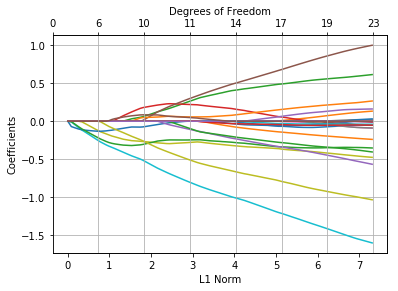

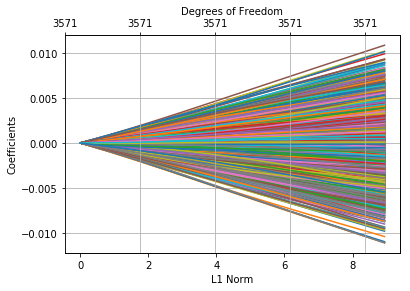

{'ax1': <matplotlib.axes._subplots.AxesSubplot at 0x7f027b267d68>,
 'ax2': <matplotlib.axes._subplots.AxesSubplot at 0x7f0279e187b8>,
 'fig': <matplotlib.figure.Figure at 0x7f02857a7ba8>}

In [4]:
# import package
import glmnet_python
from glmnet import glmnet
# fit models
fit_lasso = glmnet(x = X, y = y, family = 'binomial')
fit_ridge = glmnet(x = X, y = y, family = 'binomial', alpha = 0)
# plot model
from glmnetPlot import glmnetPlot 
glmnetPlot(fit_lasso)
glmnetPlot(fit_ridge)

## Question 3. Réaliser une expérience de validation croisée en utilisant la fonction *cvglmnet()* et afficher les résultats avec la fonction *cvglmnetPlot()*. A quoi correspondent les deux droites verticales représentées par des pointillés bleus ?

In [5]:
# carry out cross-validation 
from cvglmnet import cvglmnet
cvfit_lasso = cvglmnet(x = X, y = y, family = "binomial", ptype="class")
cvfit_ridge = cvglmnet(x = X, y = y, family = "binomial", ptype="class", alpha = 0)

/Softs/virtualenvPython/piedros/lib/python3.5/site-packages/glmnet_python/cvglmnetPlot.py:82: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
/Softs/virtualenvPython/piedros/lib/python3.5/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Softs/virtualenvPython/piedros/lib/python3.5/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


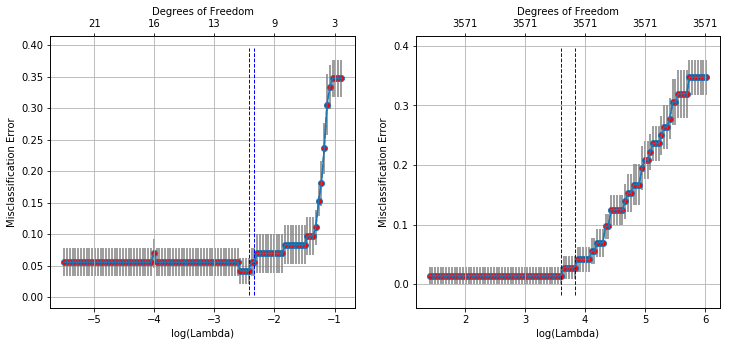

In [6]:
# plot result
from cvglmnetPlot import cvglmnetPlot
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
cvglmnetPlot(cvfit_lasso)
plt.subplot(1,2,2)
cvglmnetPlot(cvfit_ridge)
plt.show()

## Question 4. Afin de mieux interpréter les résulats, représenter sur une même figure l'évolution des performances de validation croisée obtenue par les deux modèles  quand le paramètre de régularisation varie. Quel modèle offre les meilleures performances ?
* contrairement aux figures générées par **cvglmnetplot()** on se contentera de représenter le taux de bonne classification (ou d'erreur) moyen par fold, que l'on trouve dans le champ $\texttt{cvm}$ du dictionnaire renvoyé par la fonction **cvglmnet()** (e.g., $\texttt{cvfit['cvm']}$).
* on se contentera de représenter l'évolution des performances en fonction de 1...100 (le nombre de valeurs de $\lambda$ considérées par défaut).

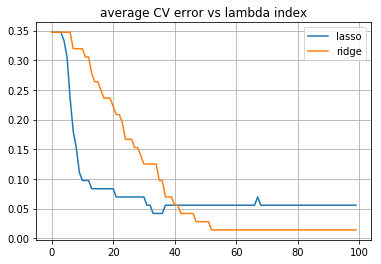

In [7]:
# plot results - focus on average accuracy
plt.figure()
plt.plot(cvfit_lasso['cvm'], label = "lasso")
plt.plot(cvfit_ridge['cvm'], label = "ridge")
plt.grid()
plt.legend()
plt.title('average CV error vs lambda index')
plt.show()

## Question 5. Reproduire cette analyse en considérant une penalité elastic-net afin de considérer un compromis entre Lasso et Ridge. Commenter les résultats.
* Il suffit pour cela de modifier le paramètre $\alpha$ de la fonction **cvglmnet()** et de le faire varier entre 0 (Ridge) et 1 (Lasso - valeur par défaut).
* On pourra par exemple considérer une grille définie par pas de 0.2.

In [8]:
# compute enet solutions
alpha_grid = [0,0.2,0.4,0.6,0.8,1]
enet_res = []
for alpha in alpha_grid :
    cvfit_enet = cvglmnet(x = X, y = y, family = "binomial", ptype="class", alpha = alpha)
    enet_res.append(cvfit_enet)

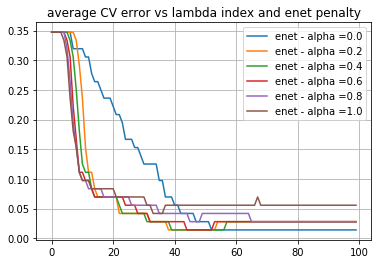

In [9]:
# show lasso, ridge & enet
plt.figure()
for i in range(len(alpha_grid)):
    plt.plot(enet_res[i]['cvm'], label = "enet - alpha =%.1f" % alpha_grid[i])
plt.grid()
plt.legend()
plt.title('average CV error vs lambda index and enet penalty')
plt.show()

## Question 6. Enfin, dresser un bilan des résultats obtenus en représentant  l'évolution (1) des meilleures performances de validation croisée et (2) du nombre de variables sélectionnées, en fonction de $\alpha$. Commenter les résultats. Quelle valeur de $\alpha$ retiendriez-vous ? Comparer le chemin de régularisation correspondant à celui du Lasso.
* Pour chaque modèle on retiendra la valeur $\texttt{lambda_1se}$ proposée par la fonction **cvglmnet()** comme "meilleur" paramètre de régularisation.
* NB : le champ $\texttt{nzero}$ de l'objet renvoyé par **cvglmnet()** donne le nombre de coefficients non-nuls pour chaque valeur de $\lambda$ considérée (l'ensemble de ces valeurs étant stockées dans le champ $\texttt{lambdau}$.)

In [10]:
# extract accuracy and support size at best model (according to 1se criterion)
lambda_crit = 'lambda_1se'
support_size = []
accuracy = []
for i in range(len(alpha_grid)) :
    ind_best = np.where(enet_res[i]['lambdau'] == enet_res[i][lambda_crit])[0]
    accuracy.append(enet_res[i]['cvm'][ind_best][0])
    support_size.append(  enet_res[i]['nzero'][ind_best][0] )


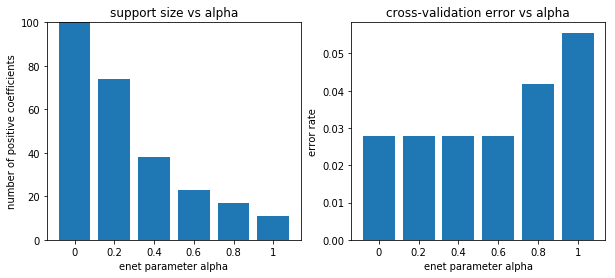

In [11]:
# plot
plt.figure(figsize=(10,4))
# plot support size
plt.subplot(1,2,1)
plt.bar(range(len(support_size)), support_size)
plt.title('support size vs alpha')
plt.xlabel('enet parameter alpha')
plt.ylabel('number of positive coefficients')
plt.ylim([0,100])
plt.xticks(range(len(accuracy)), alpha_grid)
# plot prediction performance
plt.subplot(1,2,2)
plt.bar(range(len(accuracy)), accuracy)
plt.title('cross-validation error vs alpha')
plt.xlabel('enet parameter alpha')
plt.ylabel('error rate')
plt.xticks(range(len(accuracy)), alpha_grid)

plt.show()

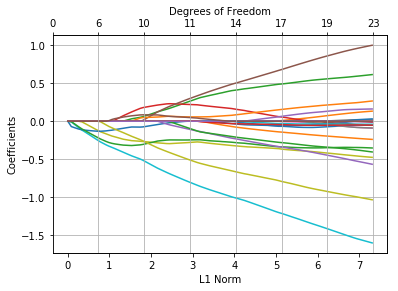

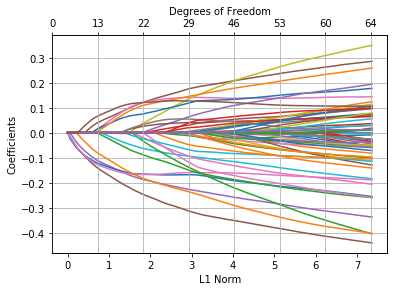

{'ax1': <matplotlib.axes._subplots.AxesSubplot at 0x7f02781947f0>,
 'ax2': <matplotlib.axes._subplots.AxesSubplot at 0x7f027803a2b0>,
 'fig': <matplotlib.figure.Figure at 0x7f0279aa0438>}

In [12]:
# show regularization paths
fit_lasso = glmnet(x = X, y = y, family = 'binomial')
fit_enet  = glmnet(x = X, y = y, family = 'binomial', alpha = 0.6)
glmnetPlot(fit_lasso)
glmnetPlot(fit_enet)